In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle


from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.exceptions
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout, Dense, Conv1D, Bidirectional, LSTM, Embedding
from tensorflow.keras.models import Sequential
# from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CZ4045 NATURAL LANG PROCESSING/Dataset/Cleaned/final_output.csv')
df = df.loc[df["Subjectivity"] == 1]
df.head()

,Original_Text,Cleaned_Text,Lemmatized_Text,Stemmed_Text,Label,Polarity,Subjectivity
1,"Im crying, but I know you dont need my tears. ...",im crying but i know you dont need my tears im...,im cry know dont need tear im praying voice re...,im cri know dont need tear im pray voic reach ...,1,1,1
2,Most successful first-world countries have alm...,most successful firstworld countries have almo...,successful firstworld country almost completel...,success firstworld countri almost complet ban ...,1,1,1
3,Look at Scandinavian countries too. Many have ...,look at scandinavian countries too many have p...,look scandinavian country many permitting requ...,look scandinavian countri mani permit requir b...,-1,0,1
4,what an incredibly stale and ignorant take on ...,what an incredibly stale and ignorant take on ...,incredibly stale ignorant take gun violence am...,incred stale ignor take gun violenc america li...,1,1,1
5,He literally wrote (right after Uvalde shootin...,he literally wrote right after uvalde shooting...,literally wrote right uvalde shooting every vi...,liter wrote right uvald shoot everi violent de...,1,1,1


In [ ]:
#get the train and test sets
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Cleaned_Text'])
x_train, x_test, y_train, y_test = train_test_split(text_tf, df['Polarity'], test_size=0.3, random_state=123)

In [ ]:
x_train

<575x10466 sparse matrix of type '<class 'numpy.float64'>'
	with 56399 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

753     1
1118    1
528     0
562     1
797     0
       ..
134     1
557     0
678     1
640     0
858     0
Name: Polarity, Length: 575, dtype: int64

In [ ]:
x_test

<247x10466 sparse matrix of type '<class 'numpy.float64'>'
	with 23303 stored elements in Compressed Sparse Row format>

In [ ]:
y_test

316     1
81      0
350     0
1210    1
395     1
       ..
886     0
239     0
43      1
301     1
750     1
Name: Polarity, Length: 247, dtype: int64

In [ ]:
def create_stacking_models():
    base_models = list()
    # base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = 7))) 
    base_models.append(('XGB', GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)))
    base_models.append(('DT', DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')))
    # base_models.append(('MNB', MultinomialNB()))
    base_models.append(('LSVC', LinearSVC())) 
    # base_models.append(('K', KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)))
    # base_models.append(('K', KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)))
    meta_model = LogisticRegression(solver='newton-cg', penalty= 'l2', C= 10)
    final_model = StackingClassifier(estimators = base_models,final_estimator = meta_model,cv = 5)
    return final_model

def models_all():
    all_models = dict()
    # all_models['Keras'] = KerasClassifier(model = kerasModel, optimizer="adam", epochs=100, verbose=0)
    # all_models['KNNC']= KNeighborsClassifier(n_neighbors = 7)
    all_models['XGBoost']= GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)
    all_models['RF']= RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)
    all_models['DT'] = DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')
    # all_models['MultinomialNB'] = MultinomialNB()
    all_models['LinearSVC'] = LinearSVC()
    # all_models['Keras'] = KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)
    # all_models['Keras'] = KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, text_tf, df['Label'], scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [ ]:
model_results = list()
models = models_all()
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>XGBoost 0.673 (0.053) 

>RF 0.664 (0.049) 

>DT 0.605 (0.055) 

>LinearSVC 0.711 (0.048) 

>Stacking 0.700 (0.055) 



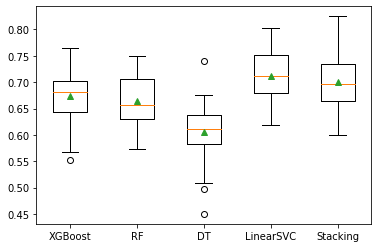

In [ ]:
from matplotlib import pyplot
pyplot.boxplot(model_results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    # MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    # KNeighborsClassifier(n_neighbors=7),
    # Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")])
]

for model in models:
    model_name = model.__class__.__name__

In [ ]:
model = create_stacking_models()
grid_search = model.fit(x_train,y_train)
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print("Testset Accuracy: %.2f%% " % (accuracy_score(y_test, y_test_pred)*100))
print("Classification Report of ",model_name,":\n",classification_report(y_test,y_test_pred))
print("Accuracy of stacking model",":",metrics.accuracy_score(y_test, y_test_pred))

Testset Accuracy: 75.30% 
Classification Report of  GradientBoostingClassifier :
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        91
           1       0.78      0.84      0.81       156

    accuracy                           0.75       247
   macro avg       0.74      0.72      0.73       247
weighted avg       0.75      0.75      0.75       247

Accuracy of stacking model : 0.7530364372469636


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle


from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.exceptions
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout, Dense, Conv1D, Bidirectional, LSTM, Embedding
from tensorflow.keras.models import Sequential
# from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CZ4045 NATURAL LANG PROCESSING/Dataset/Cleaned/final_output.csv')
df.head()

,Original_Text,Cleaned_Text,Lemmatized_Text,Stemmed_Text,Label,Polarity,Subjectivity
0,"""He then went on to tell me about what the US ...",he then went on to tell me about what the us w...,went tell u like back started turn onward form...,went tell us like back start turn onward form ...,0,0,0
1,"Im crying, but I know you dont need my tears. ...",im crying but i know you dont need my tears im...,im cry know dont need tear im praying voice re...,im cri know dont need tear im pray voic reach ...,1,1,1
2,Most successful first-world countries have alm...,most successful firstworld countries have almo...,successful firstworld country almost completel...,success firstworld countri almost complet ban ...,1,1,1
3,Look at Scandinavian countries too. Many have ...,look at scandinavian countries too many have p...,look scandinavian country many permitting requ...,look scandinavian countri mani permit requir b...,-1,0,1
4,what an incredibly stale and ignorant take on ...,what an incredibly stale and ignorant take on ...,incredibly stale ignorant take gun violence am...,incred stale ignor take gun violenc america li...,1,1,1


In [ ]:
#get the train and test sets
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Cleaned_Text'])
x_train, x_test, y_train, y_test = train_test_split(text_tf, df['Subjectivity'], test_size=0.3, random_state=123)

In [ ]:
def create_stacking_models():
    base_models = list()
    # base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = 7))) 
    base_models.append(('XGB', GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)))
    base_models.append(('DT', DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')))
    # base_models.append(('MNB', MultinomialNB()))
    base_models.append(('LSVC', LinearSVC())) 
    # base_models.append(('K', KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)))
    # base_models.append(('K', KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)))
    meta_model = LogisticRegression(solver='newton-cg', penalty= 'l2', C= 10)
    final_model = StackingClassifier(estimators = base_models,final_estimator = meta_model,cv = 5)
    return final_model

def models_all():
    all_models = dict()
    # all_models['Keras'] = KerasClassifier(model = kerasModel, optimizer="adam", epochs=100, verbose=0)
    # all_models['KNNC']= KNeighborsClassifier(n_neighbors = 7)
    all_models['XGBoost']= GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)
    all_models['RF']= RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)
    all_models['DT'] = DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')
    # all_models['MultinomialNB'] = MultinomialNB()
    all_models['LinearSVC'] = LinearSVC()
    # all_models['Keras'] = KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)
    # all_models['Keras'] = KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, text_tf, df['Label'], scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [ ]:
model_results = list()
models = models_all()
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>XGBoost 0.541 (0.037) 

>RF 0.517 (0.036) 

>DT 0.428 (0.040) 

>LinearSVC 0.558 (0.047) 

>Stacking 0.573 (0.038) 



In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    # MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    # KNeighborsClassifier(n_neighbors=7),
    # Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")])
]

for model in models:
    model_name = model.__class__.__name__

In [ ]:
model = create_stacking_models()
grid_search = model.fit(x_train,y_train)
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print("Testset Accuracy: %.2f%% " % (accuracy_score(y_test, y_test_pred)*100))
print("Classification Report of ",model_name,":\n",classification_report(y_test,y_test_pred))
print("Accuracy of stacking model",":",metrics.accuracy_score(y_test, y_test_pred))

Testset Accuracy: 71.15% 
Classification Report of  GradientBoostingClassifier :
               precision    recall  f1-score   support

           0       0.60      0.25      0.35       114
           1       0.73      0.92      0.81       250

    accuracy                           0.71       364
   macro avg       0.66      0.58      0.58       364
weighted avg       0.69      0.71      0.67       364

Accuracy of stacking model : 0.7115384615384616


### Balanced (Polarity)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle


from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.exceptions
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout, Dense, Conv1D, Bidirectional, LSTM, Embedding
from tensorflow.keras.models import Sequential
# from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
df = pd.read_csv('/content/drive/MyDrive/CZ4045 NATURAL LANG PROCESSING/Dataset/Cleaned/final_output.csv')
df.head()

,Original_Text,Cleaned_Text,Lemmatized_Text,Stemmed_Text,Label,Polarity,Subjectivity
0,"""He then went on to tell me about what the US ...",he then went on to tell me about what the us w...,went tell u like back started turn onward form...,went tell us like back start turn onward form ...,0,0,0
1,"Im crying, but I know you dont need my tears. ...",im crying but i know you dont need my tears im...,im cry know dont need tear im praying voice re...,im cri know dont need tear im pray voic reach ...,1,1,1
2,Most successful first-world countries have alm...,most successful firstworld countries have almo...,successful firstworld country almost completel...,success firstworld countri almost complet ban ...,1,1,1
3,Look at Scandinavian countries too. Many have ...,look at scandinavian countries too many have p...,look scandinavian country many permitting requ...,look scandinavian countri mani permit requir b...,-1,0,1
4,what an incredibly stale and ignorant take on ...,what an incredibly stale and ignorant take on ...,incredibly stale ignorant take gun violence am...,incred stale ignor take gun violenc america li...,1,1,1


In [6]:
print(len(df[df['Polarity'] == 0]))

692


In [7]:
print(len(df[df['Polarity'] == 1]))

521


In [8]:
print(len(df[df['Subjectivity'] == 0]))

391


In [9]:
print(len(df[df['Subjectivity'] == 1]))

822


In [31]:
#get the train and test sets
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['Cleaned_Text'])
x_train, x_test, y_train, y_test = train_test_split(text_tf, df['Polarity'], test_size=0.3, random_state=123)

from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 500, 1: 349})
Testing target statistics: Counter({0: 192, 1: 172})


In [32]:
# rebalance data by oversampling the smaller class
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
x_train, y_train = under_sampler.fit_resample(x_train, y_train)

In [33]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 349, 1: 349})
Testing target statistics: Counter({0: 192, 1: 172})


In [34]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = 7))) 
    base_models.append(('XGB', GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)))
    base_models.append(('DT', DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')))
    base_models.append(('MNB', MultinomialNB()))
    base_models.append(('LSVC', LinearSVC())) 
    # base_models.append(('K', KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)))
    # base_models.append(('K', KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)))
    meta_model = LogisticRegression(solver='newton-cg', penalty= 'l2', C= 10)
    final_model = StackingClassifier(estimators = base_models,final_estimator = meta_model,cv = 5)
    return final_model

def models_all():
    all_models = dict()
    # all_models['Keras'] = KerasClassifier(model = kerasModel, optimizer="adam", epochs=100, verbose=0)
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = 7)
    all_models['XGBoost']= GradientBoostingClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65)
    all_models['RF']= RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 50, criterion= 'entropy', bootstrap= False)
    all_models['DT'] = DecisionTreeClassifier(min_samples_split= 11, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 65, criterion= 'entropy')
    # all_models['MultinomialNB'] = MultinomialNB()
    all_models['LinearSVC'] = LinearSVC()
    # all_models['Keras'] = KerasClassifier(model = kerasModel(), optimizer="adam", epochs=100, verbose=0)
    # all_models['Keras'] = KerasClassifier(model = Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")]), optimizer="adam", epochs=100, verbose=0)
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, text_tf, df['Label'], scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [35]:
model_results = list()
models = models_all()
names = list()

# Create a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.396 (0.047) 

>XGBoost 0.543 (0.043) 

>RF 0.509 (0.036) 

>DT 0.428 (0.042) 

>LinearSVC 0.558 (0.047) 

>Stacking 0.557 (0.034) 



In [36]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(n_neighbors=7),
    # Sequential([Embedding(5000, 128, input_length=100), Dropout(.4), Conv1D(256, 7, activation="relu"), Bidirectional(LSTM(64, return_sequences=True)), LSTM(32, return_sequences=True), LSTM(16), Dropout(.4), Dense(1, activation="sigmoid")])
]

for model in models:
    model_name = model.__class__.__name__

In [37]:
model = create_stacking_models()
grid_search = model.fit(x_train,y_train)
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)
print("Testset Accuracy: %.2f%% " % (accuracy_score(y_test, y_test_pred)*100))
print("Classification Report of ",model_name,":\n",classification_report(y_test,y_test_pred))
print("Accuracy of stacking model",":",metrics.accuracy_score(y_test, y_test_pred))

Testset Accuracy: 65.66% 
Classification Report of  KNeighborsClassifier :
               precision    recall  f1-score   support

           0       0.68      0.65      0.67       192
           1       0.63      0.66      0.65       172

    accuracy                           0.66       364
   macro avg       0.66      0.66      0.66       364
weighted avg       0.66      0.66      0.66       364

Accuracy of stacking model : 0.6565934065934066
